In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
column_names = ['original','label 1','score 1','label 2','score 2','label 3','score 3','label 4','score 4','label 5','score 5']

deit = pd.read_csv('../../networks/birds_deit/outOfDistribution.csv',sep=';',names=column_names)
levit = pd.read_csv('../../networks/birds_levit/outOfDistribution.csv',sep=';',names=column_names)
effnet = pd.read_csv('../../networks/birds_effnet/outOfDistribution.csv',sep=';',names=column_names)

# Clean up

In [3]:
#ORANGE_BREASTED_BUNTING ist dem Modell bekannt. Es ist trotzdem in der Liste, wegen eines Rechtschreibfehlers in den Übungsdaten
#RUFOUS_MOTMOT | RUFUOS MOTMOT
deit = deit[(deit['original'] != 'ORANGE_BREASTED_BUNTING') & (deit['original'] != 'RUFOUS_MOTMOT')]
levit = levit[(levit['original'] != 'ORANGE_BREASTED_BUNTING') & (levit['original'] != 'RUFOUS_MOTMOT')]
effnet = effnet[(effnet['original'] != 'ORANGE_BREASTED_BUNTING') & (effnet['original'] != 'RUFOUS_MOTMOT')]

# Overall Distribution

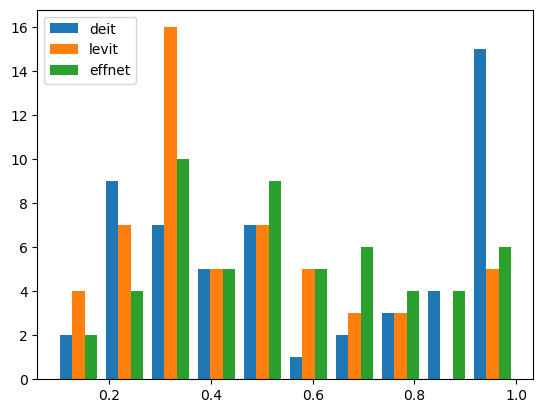

In [4]:
plt.hist([deit['score 1'],levit['score 1'],effnet['score 1']],bins=10)
plt.legend(['deit','levit','effnet'])

In [5]:
deit[deit['score 1'] > .90]

,original,label 1,score 1,label 2,score 2,label 3,score 3,label 4,score 4,label 5,score 5
0,AFRICAN_SKIMMER,BLACK SKIMMER,0.998512,CASPIAN TERN,0.000340,INCA TERN,0.000237,PUFFIN,0.000107,NORTHERN JACANA,0.000093
6,BLACK_GRASSWREN,ROADRUNNER,0.974706,LIMPKIN,0.010753,COPPERY TAILED COUCAL,0.002619,AUSTRAL CANASTERO,0.002350,TRICOLORED BLACKBIRD,0.001921
11,BROWN_WINGED_STARLING,BLUE MALKOHA,0.953880,BREWERS BLACKBIRD,0.006845,COMMON GRACKLE,0.004734,YELLOW CACIQUE,0.003890,CRESTED OROPENDOLA,0.002816
12,COOPMANSS_ELAENIA,NORTHERN BEARDLESS TYRANNULET,0.920845,RUBY CROWNED KINGLET,0.030516,GREATER PEWEE,0.025688,PINK ROBIN,0.002690,CAPE MAY WARBLER,0.001796
17,JAMAICAN_LIZARD_CUCKOO,MANGROVE CUCKOO,0.920993,BEARDED REEDLING,0.041962,CEDAR WAXWING,0.004018,EUROPEAN GOLDFINCH,0.002292,ARARIPE MANAKIN,0.001697
22,LANNER_FALCON,ROUGH LEG BUZZARD,0.914725,RED TAILED HAWK,0.019239,MERLIN,0.013495,CALIFORNIA GULL,0.011930,PEREGRINE FALCON,0.008837
26,LESSER_ANTILLEAN_PEWEE,CINNAMON FLYCATCHER,0.956309,CHESTNUT WINGED CUCKOO,0.006344,DAURIAN REDSTART,0.003529,PYGMY KINGFISHER,0.003394,FIERY MINIVET,0.003215
29,MALAGASY_TURTLE_DOVE,ZEBRA DOVE,0.935145,GREEN WINGED DOVE,0.028416,ROCK DOVE,0.005373,EUROPEAN TURTLE DOVE,0.004377,FLAME BOWERBIRD,0.003161
30,MEXICAN_WOODNYMPH,RUBY THROATED HUMMINGBIRD,0.924896,WHITE EARED HUMMINGBIRD,0.053609,HORNED SUNGEM,0.009623,ANNAS HUMMINGBIRD,0.002742,AFRICAN EMERALD CUCKOO,0.001419
33,MOUNTAIN_VELVETBREAST,WHITE EARED HUMMINGBIRD,0.952897,RUBY THROATED HUMMINGBIRD,0.019394,LUCIFER HUMMINGBIRD,0.012392,GREAT JACAMAR,0.009157,AMETHYST WOODSTAR,0.001076


In [6]:
path_to_ood_images = "C:\\Users\\Simon\\Desktop\\birds\\set"
path_to_val_images = "D:\\Datasets\\bird-species-dataset\\data\\valid"

def compare_birds(bird_1, bird_2):
    fig, axs = plt.subplots(1,2)
    axs[0].imshow(Image.open(f"{path_to_ood_images}\\{bird_1}.jpg"))
    axs[0].axis("off")
    axs[1].imshow(Image.open(f"{path_to_val_images}\\{bird_2}\\1.jpg"))
    axs[1].axis("off")

def compare_birds_row(df,i=0, img_index = (1,1,1,1,1), show_text=True):
    fig, axs = plt.subplots(1,6)
    axs[0].imshow(Image.open(f"{path_to_ood_images}\\{df['original'].iloc[i]}.jpg"))
    axs[0].axis("off")
    axs[1].imshow(Image.open(f"{path_to_val_images}\\{df['label 1'].iloc[i]}\\{img_index[0]}.jpg"))
    axs[1].axis("off")
    axs[2].imshow(Image.open(f"{path_to_val_images}\\{df['label 2'].iloc[i]}\\{img_index[1]}.jpg"))
    axs[2].axis("off")
    axs[3].imshow(Image.open(f"{path_to_val_images}\\{df['label 3'].iloc[i]}\\{img_index[2]}.jpg"))
    axs[3].axis("off")
    axs[4].imshow(Image.open(f"{path_to_val_images}\\{df['label 4'].iloc[i]}\\{img_index[3]}.jpg"))
    axs[4].axis("off")
    axs[5].imshow(Image.open(f"{path_to_val_images}\\{df['label 5'].iloc[i]}\\{img_index[4]}.jpg"))
    axs[5].axis("off")
    
    if show_text:
        print(f"{df['original'].iloc[i]}\n1: {df['label 1'].iloc[i]} ({df['score 1'].iloc[i]:.4})\n2: {df['label 2'].iloc[i]} ({df['score 2'].iloc[i]:.4})\n3: {df['label 3'].iloc[i]} ({df['score 3'].iloc[i]:.4})\n4: {df['label 4'].iloc[i]} ({df['score 4'].iloc[i]:.4})\n5: {df['label 5'].iloc[i]} ({df['score 5'].iloc[i]:.4})")

In [7]:
global_show_text = True

# DeiT

AFRICAN_SKIMMER
1: BLACK SKIMMER (0.9985)
2: CASPIAN TERN (0.0003396)
3: INCA TERN (0.000237)
4: PUFFIN (0.000107)
5: NORTHERN JACANA (9.251e-05)


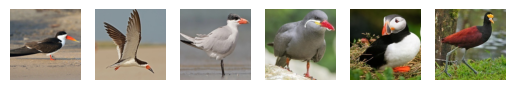

In [8]:
compare_birds_row(deit.sort_values(by='score 1', ascending=False),show_text=global_show_text)

BEARDED_SCREECH_OWL
1: GREAT GRAY OWL (0.4658)
2: GREAT POTOO (0.4281)
3: TAWNY FROGMOUTH (0.03228)
4: LONG-EARED OWL (0.02502)
5: AUSTRALASIAN FIGBIRD (0.003082)


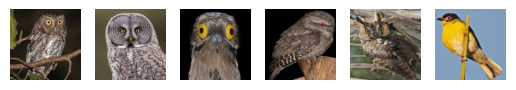

In [9]:
compare_birds_row(deit.sort_values(by='score 2', ascending=False),show_text=global_show_text)

RUFOUS_BREASTED_PICULET
1: RED FODY (0.3592)
2: HEPATIC TANAGER (0.2532)
3: FLAME TANAGER (0.2429)
4: SCARLET FACED LIOCICHLA (0.01554)
5: AZARAS SPINETAIL (0.01324)


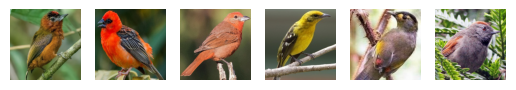

In [10]:
compare_birds_row(deit.sort_values(by='score 3', ascending=False),show_text=global_show_text)

# LeViT

PYGMY_NIGHTJAR
1: COMMON POORWILL (0.9856)
2: EASTERN WIP POOR WILL (0.006401)
3: MASKED BOBWHITE (0.0009313)
4: GREATOR SAGE GROUSE (0.0005356)
5: OILBIRD (0.0003391)


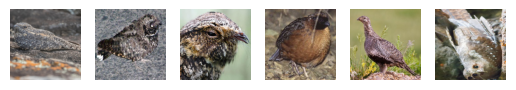

In [11]:
compare_birds_row(levit.sort_values(by='score 1', ascending=False),show_text=global_show_text)

NORTHERN_PIED_BABBLER
1: GRAY KINGBIRD (0.4332)
2: RED WISKERED BULBUL (0.3527)
3: NORTHERN MOCKINGBIRD (0.04104)
4: PURPLE MARTIN (0.02122)
5: COMMON GRACKLE (0.02015)


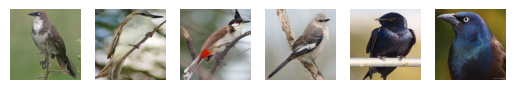

In [12]:
compare_birds_row(levit.sort_values(by='score 2', ascending=False),show_text=global_show_text)

OWSTONS_TIT
1: VARIED THRUSH (0.2855)
2: BARN SWALLOW (0.2432)
3: AMERICAN ROBIN (0.2061)
4: PYGMY KINGFISHER (0.1545)
5: EASTERN BLUEBIRD (0.01469)


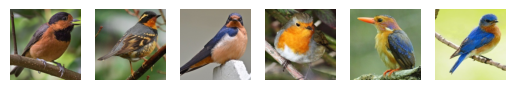

In [13]:
compare_birds_row(levit.sort_values(by='score 3', ascending=False),show_text=global_show_text)

# EffNet

MINDANAO_BLEEDING_HEART
1: PURPLE GALLINULE (0.09454)
2: GOLDEN CHLOROPHONIA (0.07215)
3: QUETZAL (0.07083)
4: MALLARD DUCK (0.06828)
5: PARADISE TANAGER (0.04237)


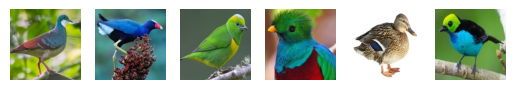

In [14]:
compare_birds_row(effnet.sort_values(by='score 1'),show_text=global_show_text)

LEAST_SEEDSNIPE
1: GREY PLOVER (0.4454)
2: SPOON BILED SANDPIPER (0.3895)
3: KILLDEAR (0.08612)
4: SORA (0.0175)
5: INLAND DOTTEREL (0.007243)


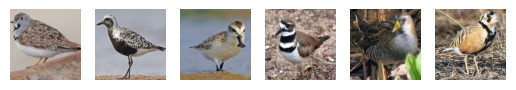

In [15]:
compare_birds_row(effnet.sort_values(by='score 2', ascending=False),show_text=global_show_text)

MALAGASY_TURTLE_DOVE
1: ZEBRA DOVE (0.3502)
2: ROCK DOVE (0.3459)
3: EUROPEAN TURTLE DOVE (0.2686)
4: MOURNING DOVE (0.01846)
5: GREEN WINGED DOVE (0.003307)


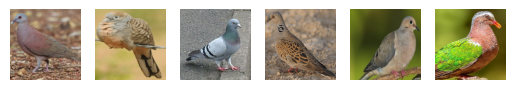

In [16]:
compare_birds_row(effnet.sort_values(by='score 3', ascending=False),show_text=global_show_text)

# Arten

In [32]:
deit[deit['original'].str.contains('DOVE')]

,original,label 1,score 1,label 2,score 2,label 3,score 3,label 4,score 4,label 5,score 5
8,BLUE_SPOTTED_WOOD_DOVE,ZEBRA DOVE,0.305495,OKINAWA RAIL,0.152232,MOURNING DOVE,0.088884,BLACK TAIL CRAKE,0.053307,AVADAVAT,0.022154
29,MALAGASY_TURTLE_DOVE,ZEBRA DOVE,0.935145,GREEN WINGED DOVE,0.028416,ROCK DOVE,0.005373,EUROPEAN TURTLE DOVE,0.004377,FLAME BOWERBIRD,0.003161
43,RAPA_FRUIT_DOVE,SCARLET CROWNED FRUIT DOVE,0.677071,ALEXANDRINE PARAKEET,0.041118,GOULDIAN FINCH,0.036986,CURL CRESTED ARACURI,0.029178,BIRD OF PARADISE,0.023532


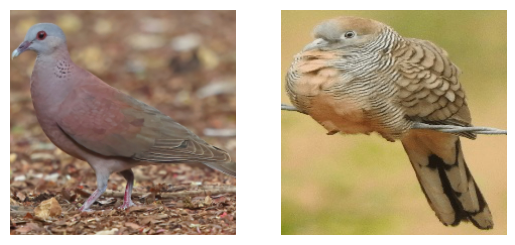

In [24]:
compare_birds('MALAGASY_TURTLE_DOVE','ZEBRA DOVE')